# Tensorflow Working Session - Day 2

In [1]:
# Usual imports
import numpy as np
import tensorflow as tf

# Let's import the Keras library
from tensorflow import keras

# Let's import the OS to use specific features 
import os 

# Plotting imports
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

/Users/aocoe/working/handsonml/env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Artificial Neural Networks

Today we will get into discussing how to train larger neural networks. First let's go over some common activation functions.

### Activation Functions

Commonly used activation functions for neural networks are 

**Logistic function (a.k.a. Logit, a.k.a. Sigmoid)**:

$f(z) = \sigma(z)= \frac{1}{1+e^{-z}}$

**Rectified Linear Unit (ReLu)**:

$f(z) = \max(0, z)$

**Hyperbolic Tangent (TanH)**:

$f(z) = \tanh(z) = \frac{e^{z}-e^{-z}}{e^{z}+e^{-z}} = 2\sigma(2z) - 1$

Let's plot these functions and look at their derivatives. 

In [2]:
# Logistic function
def logit(z):
    return 1 / (1 + np.exp(-z))

# Relu function
def relu(z):
    return np.maximum(0, z)

# Performs derivative of the function, f, up to the eps
def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

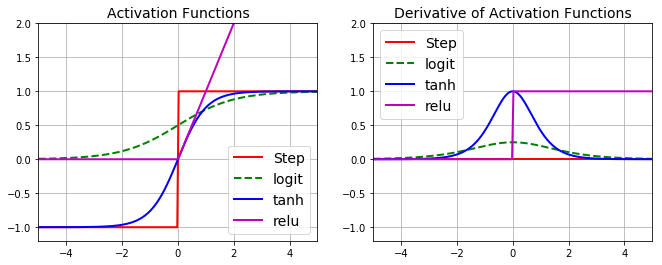

In [3]:
# Data to plot
z = np.linspace(-5, 5, 200)

# Set figure size
plt.figure(figsize=(11,4))

# Subplot for activation functions
plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2,label="logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="tanh")
plt.plot(z, relu(z), "m-", linewidth=2,label="relu")
plt.grid(True)
plt.legend(loc="lower right", fontsize=14)
plt.title("Activation Functions", fontsize=14)
plt.axis([-5, 5, -1.2, 2])

# Subplot for derivative of activation functions
plt.subplot(122)
plt.plot(z, derivative(np.sign,z), "r-", linewidth=2, label="Step")
plt.plot(z, derivative(logit,z), "g--", linewidth=2,label="logit")
plt.plot(z, derivative(np.tanh,z), "b-", linewidth=2, label="tanh")
plt.plot(z, derivative(relu,z), "m-", linewidth=2,label="relu")
plt.grid(True)
plt.legend(loc="upper left", fontsize=14)
plt.title("Derivative of Activation Functions", fontsize=14)
plt.axis([-5, 5, -1.2, 2])

plt.show()

Let's talk about the above activation functions. 

For the *step* function we can see that the derivative is 0 and so there is no gradient to work with. The *logistic* function remedies this since it has a nonzero derivative everywhere allowing Gradient Descent to work at every step. 

The *hyperbolic tangent* function is similar to the logistic function in that it is continuous and differentiable but the output ranges from $-1$ to $1$. This tends to make each layer's output more normalized (centered at zero) and so this helps with speeding up training. 

The *recitified linear unit* is continuous but not differentiable, as it abruptly changes and this can make Gradient Descent bounce around. It has the advantage of being faster to compute and also the maximum output is unbounded, which can improve training as well. 

### *Single Perceptron*:

Let's first present the artificial neuron called a linear threshold unit (LTU) which is the building block of the Perceptron:

<img src = 'LTU.png'>

where it computes a weighted sum of its inputs 

$ z = w_1x_1 + w_2x_2 + \cdot\cdot\cdot + w_nx_n = \mathbf{w}^{T}\cdot\mathbf{x}$.

The above figure is also know as a linear threshold unit (or artificial neuron). 

A Perceptron is composed of a single layer of LTUs connected to all the input neurons and input biases. A perceptron with two input neurons and three outputs is shown below. This can classify instances into 3 different binary classes. 

<img src = 'perceptron_diagram.png'>

The learning rule (weight update) for a Perceptron can be summarized as: 

$w_{i,j}\leftarrow w_{i,j} + \eta (y_j - \hat{y}_j)x_i$

where
 - $w_{i,j}$ is the connection weight between the $i^{th}$ input neuron and the $j^{th}$ output neuron.   
 - $x_i$ is the $i^{th}$ input value of the current training instance.   
 - $\hat{y}_j$ is the output of the $j^{th}$ ouput neuron for the current training instance. 
 - $y_j$ is the target output of the $j^{th}$ output neuron for the current training instance. 
 - $\eta$ is the learning rate. 

### *Multi-layer Perceptrons and Backpropagation*

In their paper *Perceptrons*, Seymour Papert and Marvin Minsky highlighted serious weaknesses of the single Perceptron learning rule (unable to solve Exclusive OR (XOR) classfication problem). To eliminate these weaknesses we can instead stack multiple Perceptrons together. This is called a *Multi-layer Perceptron*. An example is shown below

<img src = 'multi_layer_perceptron.png'>

These artificial neural networks can be composed of one input layer, one or more hidden layers, and one final layer. Every layer except the last layer includes a bias neuron and is fully connected. Note, that a neural network with 2 or more layers is considered a *deep* neural network.

The multi-layer Percpetion above is modeled as:

$z^{[2]} = XW^{[1]} + b^{[1]}$

$a^{[2]} = f(z^{[2]})=h_w(z^{[2]})$

$z^{[3]} = a^{[2]}W^{[2]} + b^{[2]} $

$\hat{y} = softmax(z^{[3]})$  

*where*:

* $X\in\mathbb{R}^{m\times n}$ are *the inputs* where $n$ is the number of instances of data and $n$ is the number of features,
* $W^{[1]}\in\mathbb{R}^{n\times h}$ are *the 1st layer weights* where the superscript $[1]$ is used for layer number one and $h$ is the number of hidden units in layer 1,
* $b^{[1]}\in\mathbb{R}^{n\times h} $ are *the 1st layer bias term* ,
* $z^{[2]}\in\mathbb{R}^{n\times h}$ are *the outputs* from first layer's weights,  
* $f(\cdot) = h_w(\cdot)$ is *the non-linear activation function*,
* $a^{[2]}\in\mathbb{R}^{n\times h}$ are *the outputs* of activation function applied first layer's outputs,
* $W^{[2]}\in\mathbb{R}^{h\times k}$ are *the 2nd layer weights* where $k$ is the number of classes,
* $b^{[2]}\in\mathbb{R}^{h\times k}$ are *the 2nd layer bias term*, 
* $\hat{y}\in\mathbb{R}^{m\times k}$ are *the prediction* probabilities where $m$ is the number of instances or examples
* $softmax$ will perform a softmax on the output of the last hidden layer. 
 
Note, in the example above we are not performing an activation on the last hidden layer. In general, this is done in practice since we will be losing information if we were to use an activation. Instead we use the outputs of the last layer as scores into the softmax layer. 



#### *Output Layer is Softmax*:

Generally, used as classification for many classes. Each class has it's own dedicated weights that are updated with backprop. Given an instance $x^{(i)}$, softmax will compute a score for each class, $k$: 

$s_{k}(x^{(i)}) = z^{[l]}$

where:
* $s_{k}$ is the score for each class, $k$. This will give us back a score vector that is $n$ or as long as number of feature (classes)
* $ z^{[l]}$ output of the last hidden layer, $[l]$

Once we have computed the score of every class for instance $x^{(i)}$ you can estimate the probability $\hat{p}_{k}$ that the instance belongs to class $k$ by taking the running score through a softmax. The softmax computes the exponential of every score then normalizes it:

$\hat{y}_{k}=\hat{p}_{k} = \frac{e^{s_{k}(x^{(i)})}}{\sum_{j=1}^{n}e^{s_{j}(x^{(i)})}}$ 

Note: sometimes $\hat{p}_{k}$ is used to denote the prediction probabilites to clarify that these are probabilites. 

where:
* $n$ is the total of classes 
* $\sum_{j=1}^{n}e^{s_{j}(x^{(i)})}$ is the running sum of the vector containing scores of each class for the instance $x^{(i)}$, which will be one score. 

Let's say the input to our $softmax$ function is $[1.2, 0.9, 0.75]$. The output of the softmax function will be $\hat{y} = [0.42, 0.31, 0.27]$. So now we can use these as probabilities for the value to be in each class. Note, that is is the same as our prediction 

The softmax function is ideally used in the output layer of the classifier where we are actually trying to attain the probabilities to define the class of each input.


#### *Summary of Steps*:

1. Randomly initialize the model's weights $W$, $b$ (we'll cover more effective initalization strategies).
2. Feed inputs $X$ into the model to do the forward pass and receive the probabilities.
3. Compare the predictions $\hat{y}$ (ex.  [0.3, 0.3, 0.4]]) with the actual target values $y$ (ex. class 2 would look like [0, 0, 1]) with the objective (cost) function to determine loss $J$. A common objective function for classification tasks is cross-entropy loss. 
4. Calculate the gradient of loss $J(W,b)$ w.r.t to the model weights, $W$. 
5. Apply backpropagation to update the weights using gradient descent. The updates will penalize the probabiltiy for the incorrect classes and encourage a higher probability for the correct class ($y$).
6. Repeat steps 2 - 4 until model performs well.

***Summary***: 

* *Objective:*  Predict the probability of class $y$ given the inputs $X$. Non-linearity is introduced to model the complex, non-linear data.
* *Advantages:*
  * Can model non-linear patterns in the data really well.
* *Disadvantages:*
  * Overfits easily.
  * Computationally intensive as network increases in size.
  * Not easily interpretable.
* *Miscellaneous:* Future neural network architectures that we'll see use the MLP as a modular unit for feed forward operations (affine transformation (XW) followed by a non-linear operation).

Let's now use Tensorflow to build a multi-layer Perceptron. 

In [4]:
# Let's load the data from the Keras library
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Here we are performing a per pixel normalization 
# for the feature data
X_train = X_train.astype(np.float32).reshape(-1, 28*28)/255.0
X_test = X_test.astype(np.float32).reshape(-1,28*28)/255.0

# Label data with the target classes
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

# Let's split the training dataset into 
# vaildation (holdout after test set) and train data
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [2]:
# To make this notebook stable across platforms, run this
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

Construction phase:

In [6]:
reset_graph()

# MNIST it's 28*28 since there is one feature per pixel
n_inputs = 28 * 28 
# Number of neurons in hidden layer 1
n_hidden1 = 300
# Number of neurons in hidden layer 2
n_hidden2=100
# Number of output label to classify
n_outputs = 10

# We don't know the size of the training batch at this point
# and so the shape of X is (None, n_inputs)
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

Let's define a neuron layer function that takes in 
parameters that specify: 

- the feature inputs, 
- the number of neurons, 
- activation function, 
- name of the layer.

In [7]:
def neuron_layer(X, n_neurons, name, activation=None):
    # Scope for specific layer
    with tf.name_scope(name): 
        
        # Get number of feature inputs, 
        # it's the second dimension (cols) since first is number of instances (rows)
        n_inputs = int(X.get_shape()[1])
        
        # See http://cs231n.github.io/neural-networks-2/ for std discussion
        # Always want to randomly initialize the weight matrix
        # If there are too many symmetries intially then gd will update the wieghts the same way
        stddev = 2 / np.sqrt(n_inputs + n_neurons)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        
        # Create the weight matrix (also called kernel), contains all weights between each input and each neuron,
        # Shape of weight matrix is (n_inputs, n_neurons)
        W = tf.Variable(init, name="kernel")
        
        # Create biases, initialized to 0 
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        
        # Create the subgraph
        # Using broadcasting to add 1D array b to 2D array X*W, 
        # this will add the 1D bias array to every every row in matrix. 
        Z = tf.matmul(X, W) + b
        
        # Activation parameter 
        if activation is not None:
            return activation(Z)
        else:
            return Z

Let's now create the deep neural net!

In [8]:
# Using named scopes 
with tf.name_scope("dnn"):
    
    # neuron_layer(input_layer, number of neuron, name, activation)
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1", 
                          activation = tf.nn.relu)
    
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2", 
                          activation = tf.nn.relu)
    
    # Last layer has no activation function
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

Instead of the usual MSE we would now like a model that estimates a high probability for a target class. If we minimize the cross-entropy we get this objective since it penalizes the low-probability model. This can be used to measure how well a set of estimated class probabilities match the target class. The objective (loss) to minimize is:

$J(W,b) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n=\text{# of classes}}y_k^{(i)}\log(\hat{y}_k^{(i)})$

where $y_k^{(i)}$ is equal to 1 if the target class for the $i$th instance is class $k$, otherwise it's equal to zero.

In [9]:
# Define the loss
with tf.name_scope("loss"):
    
    # Cross-entropy is calculated based on last layer "logits"
    # It expects labels in the form 0 to number_of_classes - 1
    # Output is a 1D tensor with cross-entropy for each 
    # instance of data
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    
    # This will compute the mean of the cross-entropy across 
    # all instances
    loss = tf.reduce_mean(xentropy, name="loss")

In [10]:
# Define the training op
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)

In [11]:
# Evaluate the results 
with tf.name_scope("eval"):
    
    # Below we are checking if the highest logit corresponds to 
    # the target class. This returns a 1D tesnor full of bools
    correct = tf.nn.in_top_k(logits, y, 1)
    
    # Cast the above bools into floats
    # Take the average and this will give us the network's 
    # overall accuracy.
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [12]:
# Initialize the global variables, create a Saver
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Execution phase:

In [13]:
#Define number of epochs
n_epochs = 40
# Define mini-batch size
batch_size = 50

Let's define a new batch function that randomly shuffles the data but will create mini-batches and so the whole dataset will be shuffled through. 

In [14]:
def shuffle_mini_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    # The number of mini-batches
    n_batches = len(X) // batch_size
    # Run through each 
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        # "yield" keyword remembers where loop left off
        yield X_batch, y_batch

We want to evaluate our training ('batch') accuracy and validation accuracy.

In [15]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_mini_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./model_ann_mnist_final.ckpt")
            
            

0 Batch accuracy: 0.9 Val accuracy: 0.9146
1 Batch accuracy: 0.94 Val accuracy: 0.9322
2 Batch accuracy: 0.94 Val accuracy: 0.9426
3 Batch accuracy: 0.9 Val accuracy: 0.949
4 Batch accuracy: 0.96 Val accuracy: 0.9552
5 Batch accuracy: 0.94 Val accuracy: 0.9556
6 Batch accuracy: 1.0 Val accuracy: 0.961
7 Batch accuracy: 0.94 Val accuracy: 0.9616
8 Batch accuracy: 0.98 Val accuracy: 0.9632
9 Batch accuracy: 0.96 Val accuracy: 0.964
10 Batch accuracy: 0.92 Val accuracy: 0.9664
11 Batch accuracy: 0.98 Val accuracy: 0.9678
12 Batch accuracy: 0.98 Val accuracy: 0.9672
13 Batch accuracy: 0.98 Val accuracy: 0.9698
14 Batch accuracy: 1.0 Val accuracy: 0.9714
15 Batch accuracy: 0.96 Val accuracy: 0.973
16 Batch accuracy: 1.0 Val accuracy: 0.9736
17 Batch accuracy: 1.0 Val accuracy: 0.9738
18 Batch accuracy: 1.0 Val accuracy: 0.975
19 Batch accuracy: 0.98 Val accuracy: 0.9748
20 Batch accuracy: 1.0 Val accuracy: 0.9748
21 Batch accuracy: 1.0 Val accuracy: 0.9756
22 Batch accuracy: 0.98 Val accura

Now, let's use our model to make a prediction!

In [16]:
with tf.Session() as sess:
    saver.restore(sess, "./model_ann_mnist_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    # Let's use our last layer, logits, to eval
    Z = logits.eval(feed_dict={X: X_new_scaled})
    # To get estimated class prob we use softmax() on logits
    # To predict a class use argmax(), which will give you 
    # back the highest logit value
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./model_ann_mnist_final.ckpt


In [17]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


### Use Tensorflow's method library to create layers:

Let's use `tf.layer.dense` to create layers instead of our own `neuron_layer()`.

Note:
- several parameters are renamed: scope becomes name, `activation_fn` becomes activation
- more differences later

In [18]:
n_inputs = 28*28 # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [19]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [20]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

In [21]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [22]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [23]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [24]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [25]:
n_epochs = 40
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_mini_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./model_ann_mnist_final.ckpt")

0 Batch accuracy: 0.9 Validation accuracy: 0.9024
1 Batch accuracy: 0.92 Validation accuracy: 0.9254
2 Batch accuracy: 0.94 Validation accuracy: 0.9372
3 Batch accuracy: 0.9 Validation accuracy: 0.9416
4 Batch accuracy: 0.94 Validation accuracy: 0.9472
5 Batch accuracy: 0.94 Validation accuracy: 0.9512
6 Batch accuracy: 1.0 Validation accuracy: 0.9548
7 Batch accuracy: 0.94 Validation accuracy: 0.961
8 Batch accuracy: 0.96 Validation accuracy: 0.9622
9 Batch accuracy: 0.94 Validation accuracy: 0.9648
10 Batch accuracy: 0.92 Validation accuracy: 0.9656
11 Batch accuracy: 0.98 Validation accuracy: 0.9666
12 Batch accuracy: 0.98 Validation accuracy: 0.9684
13 Batch accuracy: 0.98 Validation accuracy: 0.9704
14 Batch accuracy: 1.0 Validation accuracy: 0.9694
15 Batch accuracy: 0.94 Validation accuracy: 0.9718
16 Batch accuracy: 0.98 Validation accuracy: 0.9726
17 Batch accuracy: 1.0 Validation accuracy: 0.9728
18 Batch accuracy: 0.98 Validation accuracy: 0.9744
19 Batch accuracy: 0.98 Vali

We can see that our accuracy improves a little more and the construction phase is much shorter by using  `tf.layer.dense`. Much of the work in these notebooks will use the Tensorflow library instead of our own methods. 

## Training Deep Neural Networks 

### Vanishing Gradients:

During Gradient Descent the gradients to update each parameter get smaller and smaller as the updates progress to lower layers where the parameters are virtually unchanged. The training does not converge to a good solution. 

The reason is that the activation function and the weight initialization technique uses a standard normal distribution. The variance becomes much larger in the later layers causing the the activation function to saturate at the higher layers. 

***Solution 1:*** Use a different initialization technique. One that makes the variance of the output layers close to input layers. 

We can do this by initializing the connection weights to be random, where $n_{input}$ and $n_{output}$ are the number of input and output connections whose weights are being initialized for the particular layer. 

*He initialization* 

This is a popular initialization technique that makes the standard normal distribution with $\mu=0$ and standard
deviation $\sigma = \sqrt\frac{2}{n_{input}+n_{output}}$. It can also be initialized using a uniform distribution between $-r$ and $r$ with $r = \sqrt\frac{6}{n_{input}+n_{output}}$. 

Note, in literature sometimes the initialization variables are shows as $\text{fan}_{in}$ for $n_{input}$ and $\text{fan}_{out}$ for $n_{output}$.

In Tensorflow, the default variance initializer is the He initialization, which can be called using `tf.variance_scaling_initializer()`.

In [26]:
# Usual setup for MNIST
reset_graph()
n_input = 28*28 # MNIST
n_hidden1 = 300

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")

In [27]:
# Note the default for the following function is the He initialization
# It considers only fan-in (n_inputs)

he_init = tf.variance_scaling_initializer()
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu,
                         kernel_initializer=he_init, name="hidden1")

***Solution 2:*** Use non-saturating activation functions.

*Leaky-ReLu*

Leaky ReLUs allow a small, positive gradient when the unit is not active.

This activation function is defined as

$f(z) = max(\alpha z, z)$ 

Here the hyperparameter $\alpha$ defines how much the function leaks. It's the slope of the function for $z<0$
and is typically set to 0.01. 

We can use the Leaky-ReLu in Tensorflow by setting `activation = tf.nn.leaky_relu()`.

First, let's plot the Leaky-ReLu. 

In [31]:
# Leaky ReLU
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

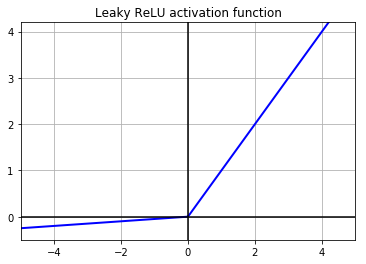

In [32]:
# Plot Leaky-ReLu
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
plt.title("Leaky ReLU activation function")
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

*Exponential Linear Unit (ELU)*

Exponential linear units try to make the mean activations closer to zero which speeds up learning. It has been shown that ELUs can obtain higher classification accuracy than ReLUs. The ELUs are defined by:

$\begin{equation}
  f(z)=\begin{cases}
    \alpha(e^{z}-1), & \text{if $z<0$},\\
    z, & \text{otherwise}.
  \end{cases}
\end{equation}$ 

In Tensorflow, we can use ELUs by setting the activation function to `activation = tf.nn.elu()`

Let's plot the ELUs.

In [33]:
def elu(z, alpha=1):
    return np.where( z < 0, alpha * (np.exp(z) - 1), z)

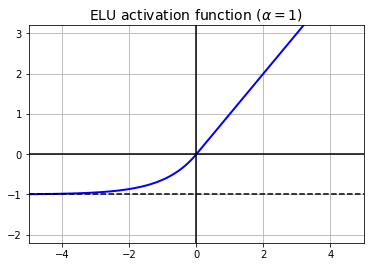

In [34]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

Let's implement a Leaky-ReLu in Tensorflow for our MNIST data. 

In [38]:
# Use Tensorflow functions to define leaky-relu function
def leaky_relu_tf(z, name=None):
    return tf.maximum(0.01*z, z, name=name)

In [39]:
reset_graph()

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [40]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=leaky_relu_tf, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=leaky_relu_tf, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [41]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [42]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [44]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [45]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [46]:
# Load the data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28)/255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28)/255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [47]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [48]:
n_epochs = 40
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y:y_batch})
        if epoch % 5 == 0:
            acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
            print(epoch, "Batch accuracy", acc_batch, "Validation accuracy:", acc_valid)
            

0 Batch accuracy 0.86 Validation accuracy: 0.9044
5 Batch accuracy 0.94 Validation accuracy: 0.9496
10 Batch accuracy 0.92 Validation accuracy: 0.9654
15 Batch accuracy 0.94 Validation accuracy: 0.971
20 Batch accuracy 1.0 Validation accuracy: 0.9764
25 Batch accuracy 1.0 Validation accuracy: 0.9778
30 Batch accuracy 0.98 Validation accuracy: 0.978
35 Batch accuracy 1.0 Validation accuracy: 0.9788


In [49]:
# Let's see the graph
from tensorflow_graph_in_jupyter import show_graph
show_graph(tf.get_default_graph().as_graph_def())

### Batch Normalization:

Although the He initialization and ELU can reduce the vanishing gradient problem at the beginning of training, it does not guarantee that it won't come back. 

*Internal covariate shift*: problem of the distribution of each layer's inputs change during training as the parameters of the previous layers change. 

Simply, it zero-centers and normalized the inputs before the activation layer. Therefore, it lets the model learn an optimal scale and mean of inputs for each layer. 

It does this by analyzing the mean and std of the inputs over the current mini-batch. 

Algorithm:
1. $\mu_{B}=\frac{1}{m_{B}}\sum_{i=1}^{m_B}\mathbf{x}^{(i)}$
2. $\sigma_{B}^2 = \frac{1}{m_B}\sum_{i=1}^{m_B}(\mathbf{x}^{(i)} - \mu_{B})^2$
3. $\hat{\mathbf{x}}^{(i)} = \frac{(\mathbf{x}^{(i)} - \mu_{B})}{\sqrt{\sigma_{B}^2 + \epsilon}}$
4. $\mathbf{z}^{(i)} = \gamma\mathbf{x}^{(i)} + \beta$

where
 -  $\mu_{B}$ is the empirical mean evaluated over the whole mini-batch $B$. 
 -  $\sigma_{B}$ is the emprirical standard deviation eval over whole mini-batch
 - $m_{B}$ is the number of instances in the mini-batch. 
 - $\mathbf{x}^{(i)}$ is the zero-centered and normalized input
 - $\gamma$ is the scaling parameter for the layer. 
 - $\beta$ is the shifting parameter or offset for the layer. 
 - $\epsilon$ is a very tiny term usually $10^{-5}$ to avoid a divide by zero. This called the smoothing term. 
 - $\mathbf{z}^{(i)}$ is scaled and shifted versioin of the inputs. 

In general, there are 4 parameters to learn for each batch-normalized layer: $\gamma$ (scale), $\beta$ (offset), $\mu$ (mean), $\sigma$ (std). 

After estimating, this will heavily reduce the vanishing/exploding gradients problem and also introduces some regularization. 

*Disadvantages*: it adds some complexity to the model, the neural network makes slower predictions due to extra computations required for each layer. If you want something fast you may want to use something like ELU+He initialization

In [50]:
reset_graph()

import tensorflow as tf

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name = "X")

# This is set to True during training otherwise it's False.
# When True this tells tf.layers.batch_normalization() 
# to use current mini-batch mean and std (during training) or 
# use the whole training set's mean and std (during testing).
training = tf.placeholder_with_default(False, shape=(), name='training')

# This creates the fully connected layers like we did before.
# Note: we are not specifying a per layer activation function 
# because we want to specify activation after the batch norm 
# layer.
hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1")

# Now we're creating the batch norm layer, setting it's training and 
# momentum parameter for batch norm.
# Note: given a new value of v, the running average v_avg 
# is updated: v_avg * momentum + v * (1- momentum)
bn1 = tf.layers.batch_normalization(hidden1, training=training, momentum=0.9)
bn1_act = tf.nn.elu(bn1)

hidden2 = tf.layers.dense(bn1_act, n_hidden2, name="hidden2")
bn2 = tf.layers.batch_normalization(hidden2, training=training, momentum=0.9)
bn2_act = tf.nn.elu(bn2)

logits_before_bn = tf.layers.dense(bn2_act, n_outputs, name="outputs")
logits = tf.layers.batch_normalization(logits_before_bn, training=training,
                                       momentum=0.9)

The above code is very repetitive and so let's use the *partial()* function as part of the functools in the Python standard library. It allows you to create a wrapper and define default parameters for your function.

Let's train a Neural Network using Batch Norm, He, and ELU activations.

In [56]:
from functools import partial #import partial from functools
reset_graph()

batch_norm_momentum = 0.9

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")
training = tf.placeholder_with_default(False, shape=(), name='training')

with tf.name_scope("dnn"):
    he_init = tf.variance_scaling_initializer()
    
    # Here is the wrapper with the parameters that are repeated
    # for the batch norm layer
    my_batch_norm_layer = partial(
            tf.layers.batch_normalization,
            training=training,
            momentum=batch_norm_momentum)
    
    # Here is the wrapper with the parameters that are repeated
    # for the dense layer
    my_dense_layer = partial(
            tf.layers.dense,
            kernel_initializer=he_init)

    hidden1 = my_dense_layer(X, n_hidden1, name="hidden1")
    bn1 = tf.nn.elu(my_batch_norm_layer(hidden1))
    hidden2 = my_dense_layer(bn1, n_hidden2, name="hidden2")
    bn2 = tf.nn.elu(my_batch_norm_layer(hidden2))
    logits_before_bn = my_dense_layer(bn2, n_outputs, name="outputs")
    logits = my_batch_norm_layer(logits_before_bn)

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

When we run the training phase we need to set the training placeholder to True. Second, the batch_normalization() function creates a few operations that must be evaluated at training step in order to update the moving averages (for the specific training set). 

We use the UPDATE_OPS collection so we just need to get a list of operations and run/update them at each training iteration.

In [57]:
n_epochs = 20
batch_size = 200

# Want to get these and update as for each training step
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run([training_op, extra_update_ops],
                     feed_dict={training: True, X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Validation accuracy:", accuracy_val)

    save_path = saver.save(sess, "./my_model_mlp_bn_final.ckpt")

0 Validation accuracy: 0.8952
1 Validation accuracy: 0.9202
2 Validation accuracy: 0.9318
3 Validation accuracy: 0.9422
4 Validation accuracy: 0.9468
5 Validation accuracy: 0.954
6 Validation accuracy: 0.9568
7 Validation accuracy: 0.96
8 Validation accuracy: 0.962
9 Validation accuracy: 0.9638
10 Validation accuracy: 0.9662
11 Validation accuracy: 0.9682
12 Validation accuracy: 0.9672
13 Validation accuracy: 0.9696
14 Validation accuracy: 0.9706
15 Validation accuracy: 0.9704
16 Validation accuracy: 0.9718
17 Validation accuracy: 0.9726
18 Validation accuracy: 0.9738
19 Validation accuracy: 0.9742


The above accuracy is not great for MNIST. Batch Norm and ELUs shine for much deeper networks. Also, the list of trainable variables is shorter than the list of all global variables. This is because the moving averages are non-trainable variables. Do not forget these moving averages non-trainable variables!

In [59]:
# Use Python list comprehension 
# To find the list of trainable variables
[var.name for var in tf.trainable_variables()]

['hidden1/kernel:0',
 'hidden1/bias:0',
 'batch_normalization/gamma:0',
 'batch_normalization/beta:0',
 'hidden2/kernel:0',
 'hidden2/bias:0',
 'batch_normalization_1/gamma:0',
 'batch_normalization_1/beta:0',
 'outputs/kernel:0',
 'outputs/bias:0',
 'batch_normalization_2/gamma:0',
 'batch_normalization_2/beta:0']

In [60]:
# Use Python list comprehension 
# To find the list of global variables
[var.name for var in tf.global_variables()]

['hidden1/kernel:0',
 'hidden1/bias:0',
 'batch_normalization/gamma:0',
 'batch_normalization/beta:0',
 'batch_normalization/moving_mean:0',
 'batch_normalization/moving_variance:0',
 'hidden2/kernel:0',
 'hidden2/bias:0',
 'batch_normalization_1/gamma:0',
 'batch_normalization_1/beta:0',
 'batch_normalization_1/moving_mean:0',
 'batch_normalization_1/moving_variance:0',
 'outputs/kernel:0',
 'outputs/bias:0',
 'batch_normalization_2/gamma:0',
 'batch_normalization_2/beta:0',
 'batch_normalization_2/moving_mean:0',
 'batch_normalization_2/moving_variance:0']

### Freezing the lower layers:

It's likely that the lower layers have detected low-level features that will be used in image classification across tasks. It's a good idea to freeze the weights. If lower-layer is frozen then it becomes easier to train the higher levels because they won't have to learn a moving target. 

In [72]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300 # reused
n_hidden2 = 100  # reused
n_hidden3 = 50  # new!
n_hidden4 = 20  # new!
n_outputs = 10  # 

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")       # reused
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2") # reused
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, name="hidden3") # reused
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="hidden4") # new!
    logits = tf.layers.dense(hidden4, n_outputs, name="outputs")                         # new!

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

In [73]:
# Update the training scope, specifiacally the minimize 
# function. 
with tf.name_scope("train"):                                         
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)    
    # Use collection TRAINABLE_VARIABLES with scope as parameter
    # Using regex where "hidden[34]|outputs" means match 
    # "hidden" with possible chars "3,4", if not matched
    # then match to "outputs"
    train_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                                   scope="hidden[34]|outputs")
    training_op = optimizer.minimize(loss, var_list=train_vars)

In [74]:
init = tf.global_variables_initializer()
new_saver = tf.train.Saver()

In [75]:
# Use collection GLOBAL_VARIABLES
# Reuse these variables 
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,
                               scope="hidden[12]")
restore_saver = tf.train.Saver(reuse_vars) # to restore layers 1-3

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "./my_model_mlp_bn_final.ckpt")

    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Validation accuracy:", accuracy_val)

    save_path = saver.save(sess, "./my_new_model_mlp_bn_final.ckpt")

INFO:tensorflow:Restoring parameters from ./my_model_mlp_bn_final.ckpt
0 Validation accuracy: 0.2282
1 Validation accuracy: 0.3176
2 Validation accuracy: 0.4288
3 Validation accuracy: 0.535
4 Validation accuracy: 0.6384
5 Validation accuracy: 0.7004
6 Validation accuracy: 0.7376
7 Validation accuracy: 0.7712
8 Validation accuracy: 0.795
9 Validation accuracy: 0.814
10 Validation accuracy: 0.832
11 Validation accuracy: 0.845
12 Validation accuracy: 0.8524
13 Validation accuracy: 0.8614
14 Validation accuracy: 0.8676
15 Validation accuracy: 0.872
16 Validation accuracy: 0.8768
17 Validation accuracy: 0.8804
18 Validation accuracy: 0.8848
19 Validation accuracy: 0.888


Another way to do this is to add `stop_gradient()` and all the layer below this addition will be frozen. 

### Caching frozen layers:

Since the frozen layers won't change it's possible to cache the output of the top frozen layer for each training instance. Training goes through the whole dataset many times, so this will give you a huge speed boost as you need to go through the frozen layers once per training instance(instead of once per epoch). Run through all the whole training set through the lower layers, then during training, instead of building training instances you would build batches of outputs from hidden layer 2 and feed them to the training op. 

In [81]:
reset_graph()

n_inputs = 28 * 28
hidden_1 = 300
hidden_2 = 100 
hidden_3 = 50
hidden_4 = 20
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu,
                              name="hidden1") # reused frozen
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu,
                              name="hidden2") # reused frozen & cached
    hidden2_stop = tf.stop_gradient(hidden2)
    hidden3 = tf.layers.dense(hidden2_stop, n_hidden3, activation=tf.nn.relu,
                              name="hidden3") # reused, not frozen
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu,
                              name="hidden4") # new!
    logits = tf.layers.dense(hidden4, n_outputs, name="outputs") # new!

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [82]:
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,
                              scope="hidden[12]") #uses regular expression
restore_saver = tf.train.Saver(reuse_vars) #restores layers 1-3

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [83]:
n_batches = len(X_train) // batch_size

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "./my_model_mlp_bn_final.ckpt")
    
    h2_cache = sess.run(hidden2, feed_dict={X: X_train})
    h2_cache_valid = sess.run(hidden2, feed_dict={X: X_valid})
    
    for epoch in range(n_epochs):
        shuffled_idx = np.random.permutation(len(X_train))
        hidden2_batches = np.array_split(h2_cache[shuffled_idx], n_batches)
        y_batches = np.array_split(y_train[shuffled_idx], n_batches)    
        for hidden2_batch, y_batch in zip(hidden2_batches, y_batches):
            sess.run(training_op, feed_dict={hidden2:hidden2_batch, y:y_batch})
    
        accuracy_val = accuracy.eval(feed_dict={hidden2: h2_cache_valid, y:y_valid})
        print(epoch, "Validation accuracy:", accuracy_val)

INFO:tensorflow:Restoring parameters from ./my_model_mlp_bn_final.ckpt
0 Validation accuracy: 0.2664
1 Validation accuracy: 0.4396
2 Validation accuracy: 0.5434
3 Validation accuracy: 0.613
4 Validation accuracy: 0.655
5 Validation accuracy: 0.6934
6 Validation accuracy: 0.7336
7 Validation accuracy: 0.7644
8 Validation accuracy: 0.79
9 Validation accuracy: 0.8078
10 Validation accuracy: 0.826
11 Validation accuracy: 0.839
12 Validation accuracy: 0.8466
13 Validation accuracy: 0.858
14 Validation accuracy: 0.8664
15 Validation accuracy: 0.8718
16 Validation accuracy: 0.875
17 Validation accuracy: 0.8798
18 Validation accuracy: 0.8854
19 Validation accuracy: 0.8884


This part of the loop for training runs the operation defined earlier (doesn't touch layer 1 and layer 2) and feeds it a a batch of outputs from the second hidden layer (as well as the targets). Tensorflow does not eval any nodes that layer 2 depends on.

### Model Zoos:
These are pre-trained models released to the public. In a future lecture, we will see this with the Tensorflow Object Detection library. 

### Optimizers:

So far we have seen four ways to speed up training and reach a better solution:
1.  apply good initialization for the connection weights
2.  use a good activation function
3.  use batch normalization
4.  reusing parts of a pretrained network


Another way is to use faster optimizers. Here's a list of optimizers that are provided by Tensorflow:

- Momentum algorithm
- Nesterov Accelerated Gradient
- AdaGrad
- RMSProp
- Adam Optimization

As of late, although some of the adaptive methods are faster, they perform worse on certain types of datasets. 

It's advisable to stick to Momentum or Nesterov 

### Learning rate scheduling:

Finding a learning rate, $\eta$, can be tricky. Too high can lead to divergence, too low can be too slow. We can use a schedule initially setting it high and then reduce once it stops making fast progress. 

Here are different types of learning rate schedules:

 - *Predetermined piecewise constant learning rate*:
 Set the learning rate to $\eta_0 = 0.1$ at first, then to $\eta_1=0.001$ after 50 epochs. Although this can work well it requires lots of fiddling around to figure out the timing.
 
 - *Performance scheduling*:
 Measure the validation error every $N$ steps (just like early stopping) and reduce the learning rate by a factor of $\lambda$ when the error stops dropping. 
 
 - *Exponential scheduling*:
 Set the learning rate to a function of the iteration number $t$: $\eta(t) = \eta_0 10^{-\frac{t}{r}}$, which requires tuning $\eta_0$ $r$. The learniing rate willl drop by a factor of 10 every iteration step.
 
 - *Power scheduling*:
 Set the learning rate to $\eta(t) = \eta_0(1+\frac{t}{r})^{-c}$ where usually $c=1$. This is similar to exponential scheduling but learning rate drops much more slowly. 

In [84]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")


In [85]:
with tf.name_scope("train"):    
    initial_learning_rate = 0.1
    decay_steps = 10000 # r 
    decay_rate = 1/10 # eta_0
    # Non-trainable var initialized to 0 to keep track of 
    # current iteration number
    global_step = tf.Variable(0, trainable=False, name="global_step")
    learning_rate = tf.train.exponential_decay(initial_learning_rate, global_step,
                                               decay_steps, decay_rate)
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=0.9)
    training_op = optimizer.minimize(loss, global_step=global_step)

In [86]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [87]:
n_epochs = 5
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Validation accuracy:", accuracy_val)

0 Validation accuracy: 0.959
1 Validation accuracy: 0.9688
2 Validation accuracy: 0.9726
3 Validation accuracy: 0.9804
4 Validation accuracy: 0.982


### Regularization:

To generalize the model better (reduce overfitting) we can use many different types of regularization. Note, the regularization tends to increase the estimator bias while reducing the variance. 

*L1 regularization*:

This type of regularization penalizes the L1 norm of the weights. Also, called ridge regression or Tikunov regularizaton. This will promote the model with parameters closer to 0 ("simpler").  

The new cost function is now
${J}(W)_{new} = J(W)+\left\| W\right\|_{1}$.

Note $\left\|W\right\|_{1}=\sum_{ij}|W_{ij}|.$

This regularization will promote the weights to have small norm but since the subgradient is $sign(W)$ the gradients are the same regardless of the size of $W$. This will result in sparse solution where $W_{ij}=0$ for several $i$, $j$'s. This may be used for feature selection where features corresponding to zero weights may be discarded. 

*L2 regularization*:

 Also, called ridge regression or Tikunov regularizaton. This will promote the model with parameters closer to 0 ("simpler"). This regularization will promote the weights to have small norm.

The new cost function is now
${J}(W)_{new} = J(W)+\frac{\alpha}{2}W^{T}W$.

The corresponding gradient is 
$\nabla_{W}J(W)_{new}= \alpha W+\nabla_{W} J(W)$.

The update equation is 
${W}\leftarrow (1-\epsilon\alpha){W} - \epsilon\nabla_{W}J(W)$

Let's implement L1 regularization manually

In [88]:
# Let's first implement L! reg manually
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    logits = tf.layers.dense(hidden1, n_outputs, name="outputs")

We can get a handle on a tensor using `get_default_graph().get_tensor_by_name()`.

In [89]:
# Get a handle on the layer weights and compute the total loss.
W1 = tf.get_default_graph().get_tensor_by_name("hidden1/kernel:0")
W2 = tf.get_default_graph().get_tensor_by_name("outputs/kernel:0")

scale = 0.001 #l1 regularization hyperparameter

# Let's now compute the total loss, sum of usual cross entropy loss and l1 loss
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                             logits=logits)
    base_loss = tf.reduce_mean(xentropy, name="avg_entropy")
    reg_losses = tf.reduce_sum(tf.abs(W1)) + tf.reduce_sum(tf.abs(W2))
    loss = tf.add(base_loss, scale * reg_losses, name="loss")

In [90]:
# The rest is the same as usual
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [91]:
n_epochs = 20
batch_size = 200

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Validation accuracy:", accuracy_val)

0 Validation accuracy: 0.831
1 Validation accuracy: 0.871
2 Validation accuracy: 0.8838
3 Validation accuracy: 0.8934
4 Validation accuracy: 0.8966
5 Validation accuracy: 0.8988
6 Validation accuracy: 0.9016
7 Validation accuracy: 0.9044
8 Validation accuracy: 0.9058
9 Validation accuracy: 0.906
10 Validation accuracy: 0.9068
11 Validation accuracy: 0.9054
12 Validation accuracy: 0.907
13 Validation accuracy: 0.9084
14 Validation accuracy: 0.9088
15 Validation accuracy: 0.9064
16 Validation accuracy: 0.9066
17 Validation accuracy: 0.9066
18 Validation accuracy: 0.9066
19 Validation accuracy: 0.9052


Another way is the pass the regularization function to
`tf.layers.dense()`, which will create operations that compute the regularization loss and add these ops to collection of the regularization loss. 

In [92]:
reset_graph()

n_inputs = 28 * 28  # MNIST
n_hidden1 = 300
n_hidden2 = 50
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

scale = 0.001

In [93]:
# Let's use the partial() function so we don't repeat same 
# arguments.
# Note we are also setting the kernel regularizer argument

my_dense_layer = partial(
    tf.layers.dense, activation=tf.nn.relu, 
    kernel_regularizer=tf.contrib.layers.l1_regularizer(scale))

with tf.name_scope("dnn"):
    hidden1 = my_dense_layer(X, n_hidden1, name="hidden1")
    hidden2 = my_dense_layer(hidden1, n_hidden2, name="hidden2")
    logits = my_dense_layer(hidden2, n_outputs, activation=None,
                            name="outputs")

In [94]:
# Let's add the regularization loss to the base loss
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
    labels=y, logits=logits)
    base_loss=tf.reduce_mean(xentropy, name="avg_entropy")
    reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    loss = tf.add_n([base_loss] + reg_losses, name="loss")

In [95]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [96]:
n_epochs = 20
batch_size = 200

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Validation accuracy:", accuracy_val)

0 Validation accuracy: 0.8274
1 Validation accuracy: 0.8766
2 Validation accuracy: 0.8952
3 Validation accuracy: 0.9016
4 Validation accuracy: 0.908
5 Validation accuracy: 0.9096
6 Validation accuracy: 0.9126
7 Validation accuracy: 0.9154
8 Validation accuracy: 0.9178
9 Validation accuracy: 0.919
10 Validation accuracy: 0.92
11 Validation accuracy: 0.9224
12 Validation accuracy: 0.9212
13 Validation accuracy: 0.9228
14 Validation accuracy: 0.9224
15 Validation accuracy: 0.9216
16 Validation accuracy: 0.9218
17 Validation accuracy: 0.9228
18 Validation accuracy: 0.9216
19 Validation accuracy: 0.9214


### Dropout:

Dropout is the *most* popular regularization technique for deep NN's. At each training step, evey neuron has a probabilty $p$ of being temporarily dropped, meaning ignored during the training step but it may be active during the next step. The hyperparameter $p$ is called the dropout rate. Typically, this is set to $50\%$. 

One way to understand this is that a unique neural network is generated at each training step. Since each neuron can be present or absent, there is a total of $2^{N}$ possible networks ($N$ is the number of dropable neurons). At each of the 10,000 training steps you have essentially trained 10,000 different neural networks each with one training instance. There are not independent networks since they share weights. This can be seen as an averaging ensemble of smaller networks.

*Technical note about dropout*:

Suppose $p=50\%$ so that during testing a neuron will be connected to twice as many input neurons (on average) as it was during training. To compensate for this we need to multipy each input neuron's connection weight by $0.5$ after training. If not each neuron will get roughly twice as large as a signal as what the network was trained on. Generally, we need to multiply by the keep probability $(1-p)$ after training or divide each neuron's output by keep prob during training. 

In [97]:
# We can apply dropout to the input layer
# We can apply to any of the outputs of the hidden layers

# Note: we must set training to True when training 
# and False during test (like Batch Norm)

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [98]:
training = tf.placeholder_with_default(False, shape=(), name='training')

dropout_rate = 0.5  # = 1 - keep_prob
X_drop = tf.layers.dropout(X, dropout_rate, training=training)

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X_drop, n_hidden1, activation=tf.nn.relu,
                              name="hidden1")
    hidden1_drop = tf.layers.dropout(hidden1, dropout_rate, training=training)
    
    hidden2 = tf.layers.dense(hidden1_drop, n_hidden2, activation=tf.nn.relu,
                              name="hidden2")
    hidden2_drop = tf.layers.dropout(hidden2, dropout_rate, training=training)
    
    logits = tf.layers.dense(hidden2_drop, n_outputs, name="outputs")

In [99]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=0.9)
    training_op = optimizer.minimize(loss)    

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [100]:
n_epochs = 20
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
        accuracy_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Validation accuracy:", accuracy_val)

0 Validation accuracy: 0.9264
1 Validation accuracy: 0.9446
2 Validation accuracy: 0.9488
3 Validation accuracy: 0.9556
4 Validation accuracy: 0.9612
5 Validation accuracy: 0.9598
6 Validation accuracy: 0.9616
7 Validation accuracy: 0.9674
8 Validation accuracy: 0.967
9 Validation accuracy: 0.9706
10 Validation accuracy: 0.9674
11 Validation accuracy: 0.9678
12 Validation accuracy: 0.9698
13 Validation accuracy: 0.97
14 Validation accuracy: 0.971
15 Validation accuracy: 0.9702
16 Validation accuracy: 0.9718
17 Validation accuracy: 0.9716
18 Validation accuracy: 0.9734
19 Validation accuracy: 0.972


### Early Stopping:

Is essentially another way to regularize. Here we stop training as soon as the validation error reaches a minimum. The prediction error on the training set will naturally go down but as does the validation error but at a certain point in th training the validation error stops decreasing and starts to go back up. This is essentially is overfitting the model and so we stop the training early. 

One way to implement this in Tensorflow is to evaluate the model on a validation set at regular intervals (say 50 steps) and save the "best" set if it outperforms the last "best" one. We then have a counter that tells us the number of steps since the last "best" set was saved and interrupt if it reaches some limit. 


In [14]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("tmp/data/")

Extracting tmp/data/train-images-idx3-ubyte.gz
Extracting tmp/data/train-labels-idx1-ubyte.gz
Extracting tmp/data/t10k-images-idx3-ubyte.gz
Extracting tmp/data/t10k-labels-idx1-ubyte.gz


In [17]:
mnist.test

In [9]:
from functools import partial

reset_graph()

n_inputs = 28 * 28
n_hidden1 = 100
n_hidden2 = 100
n_outputs = 10

dropout_rate = 0.5

graph = tf.Graph()
with graph.as_default():
    with tf.name_scope("inputs"):
        X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
        y = tf.placeholder(tf.int32, shape=[None], name="y")
        training = tf.placeholder_with_default(False, shape=[], name="training")
        X_drop = tf.layers.dropout(X, dropout_rate, training=training)
        
    he_init = tf.variance_scaling_initializer()
    
    dense_layer = partial(tf.layers.dense, 
                         kernel_initializer=he_init,
                         activation=tf.nn.elu)
    
    hidden1 = dense_layer(X_drop, n_hidden1, name="hidden1")
    hidden2 = dense_layer(hidden1, n_hidden2, name="hidden2")
    logits = dense_layer(hidden2, n_outputs, activation=None, name="output")
    Y_proba = tf.nn.softmax(logits)
    
    with tf.name_scope("train"):
        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
        loss = tf.reduce_mean(xentropy)
        optimizer = tf.train.AdamOptimizer()
        training_op = optimizer.minimize(loss)
        
    with tf.name_scope("eval"):
        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
        
    with tf.name_scope("init_and_save"):
        init = tf.global_variables_initializer()
        saver = tf.train.Saver()
        

In [20]:
n_epochs = 1000
batch_size = 50

best_acc_val = 0
check_interval = 100
checks_since_last_improvement = 0
max_checks_without_improvement = 100

with tf.Session(graph=graph) as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch, training: True})
            if iteration % check_interval == 0:
                acc_val = accuracy.eval(feed_dict={X:mnist.validation.images[:2000], y:mnist.validation.labels[:2000]})
                if acc_val > best_acc_val:
                    best_acc_val = acc_val
                    # This counter will reset every time we improve
                    checks_since_last_improvement = 0
                    saver.save(sess, "./my_best_model_so_far")
                else:
                    checks_since_last_improvement += 1
        # Let's get the training, validation accuracy for the epoch
        acc_train = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        acc_val = accuracy.eval(feed_dict={X:mnist.validation.images[2000:], y:mnist.validation.labels[2000:]})
        
        print("Epoch:", epoch, "Train accuracy:", acc_train, 
              "Validation accuracy:", acc_val, 
              "Best valid accuracy:", best_acc_val)
        
        if checks_since_last_improvement > max_checks_without_improvement:
            print("Early stopping!")
            saver.restore(sess, "./my_best_model_so_far")
            break
            
    acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
    print("Final accuracy", acc_test)
    save_path = saver.save(sess, "./my_final_mnist_early_stop_model")

Epoch: 0 Train accuracy: 0.98 Validation accuracy: 0.956 Best valid accuracy: 0.9275
Epoch: 1 Train accuracy: 0.96 Validation accuracy: 0.9663333 Best valid accuracy: 0.953
Epoch: 2 Train accuracy: 0.94 Validation accuracy: 0.97333336 Best valid accuracy: 0.963
Epoch: 3 Train accuracy: 0.92 Validation accuracy: 0.97 Best valid accuracy: 0.97
Epoch: 4 Train accuracy: 0.96 Validation accuracy: 0.97366667 Best valid accuracy: 0.97
Epoch: 5 Train accuracy: 0.92 Validation accuracy: 0.97833335 Best valid accuracy: 0.9725
Epoch: 6 Train accuracy: 0.98 Validation accuracy: 0.9826667 Best valid accuracy: 0.975
Epoch: 7 Train accuracy: 0.98 Validation accuracy: 0.981 Best valid accuracy: 0.9755
Epoch: 8 Train accuracy: 0.98 Validation accuracy: 0.9816667 Best valid accuracy: 0.976
Epoch: 9 Train accuracy: 0.98 Validation accuracy: 0.981 Best valid accuracy: 0.9765
Epoch: 10 Train accuracy: 0.98 Validation accuracy: 0.9826667 Best valid accuracy: 0.9765
Epoch: 11 Train accuracy: 1.0 Validation a

### Data Augmentation:

This technique consists of generating new training instances from existing one, artificially boosting the size of the training set. 

Tensorflow offers several image manipulation operations. Check the API documentation. 

### PRACTICAL GUIDELINES!!!!

These are *very* general guidelines. Your configuration may vary depending on the data. 

*Default configuration*:

| Variable      | Configuration   |
|---------------|-----------------|
| Initialization| He              |
| Activation    | ELU             |
| Normalization | Batch Norm      |
| Regularization| Dropout         |
| Optimizer     | Nesterov        |
| LR Schedule   | None            |

*How to tweak things*:
- Can't find a good learning rate, add a lr schedule.
- Need sparse model, run L1 regularization. 
- Training set too small implement data augmentation
- Need faster model at runtime, drop batch norm, replece ELU with leaky ReLU

### References

1. https://www.tensorflow.org/guide/
2. Geron, Aurelion. *Hands On Machine Learning With Sci-Kit Learn and Tensorflow*. O'Reilly, 2016.